In [1]:
import pandas as pd
from datasource.price import get_historical
import matplotlib.pyplot as plt

from feature_util.ohlc import CCIFeatureProducer
from feature_util.ohlc import SimpleMovingAverageFeatureProducer
from feature_util.ohlc import ExponentialMovingAverageFeatureProducer
from feature_util.ohlc import TypicalPriceFeatureProducer

In [22]:
symbol = 'FOX'

In [23]:
df = get_historical(symbol, '2018-1-1', '2018-5-12')

In [24]:
df

,close,high,low,open,volume
2018-01-02,35.188118,35.208021,34.103416,34.212881,3043416
2018-01-03,35.755347,36.063840,35.198069,35.198069,3232774
2018-01-04,35.994180,36.043937,35.606076,35.984229,2659731
2018-01-05,36.173305,36.262868,35.685687,36.223062,4642712
2018-01-08,35.675736,36.014083,35.337389,35.954375,4442866
2018-01-09,36.004132,36.193208,35.645882,35.645882,4053953
2018-01-10,35.148312,36.113597,34.899527,36.014083,6527002
2018-01-11,35.625979,35.745396,35.128409,35.128409,2694007
2018-01-12,36.193208,36.302674,35.546368,35.625979,2237505
2018-01-16,35.616028,36.352430,35.576222,36.322576,3126945


In [25]:
cci_producer = CCIFeatureProducer(period=20, abs_threshold=None)
feat_df = cci_producer.produce(df)

sma_producer = SimpleMovingAverageFeatureProducer(period=20)
ema_producer = ExponentialMovingAverageFeatureProducer(period=20)

feat_df = sma_producer.produce(feat_df)
feat_df = ema_producer.produce(feat_df)

tp_producer = TypicalPriceFeatureProducer()
feat_df = tp_producer.produce(feat_df)

In [26]:
feat_df

,close,high,low,open,volume,cci,close_sma_20,close_ema_20,tp
2018-01-02,35.188118,35.208021,34.103416,34.212881,3043416,NaN,NaN,35.188118,34.833185
2018-01-03,35.755347,36.063840,35.198069,35.198069,3232774,NaN,NaN,35.485913,35.672419
2018-01-04,35.994180,36.043937,35.606076,35.984229,2659731,NaN,NaN,35.672546,35.881398
2018-01-05,36.173305,36.262868,35.685687,36.223062,4642712,NaN,NaN,35.817107,36.040620
2018-01-08,35.675736,36.014083,35.337389,35.954375,4442866,NaN,NaN,35.782911,35.675736
2018-01-09,36.004132,36.193208,35.645882,35.645882,4053953,NaN,NaN,35.829578,35.947741
2018-01-10,35.148312,36.113597,34.899527,36.014083,6527002,NaN,NaN,35.700768,35.387146
2018-01-11,35.625979,35.745396,35.128409,35.128409,2694007,NaN,NaN,35.687840,35.499928
2018-01-12,36.193208,36.302674,35.546368,35.625979,2237505,NaN,NaN,35.768904,36.014083
2018-01-16,35.616028,36.352430,35.576222,36.322576,3126945,NaN,NaN,35.745882,35.848227


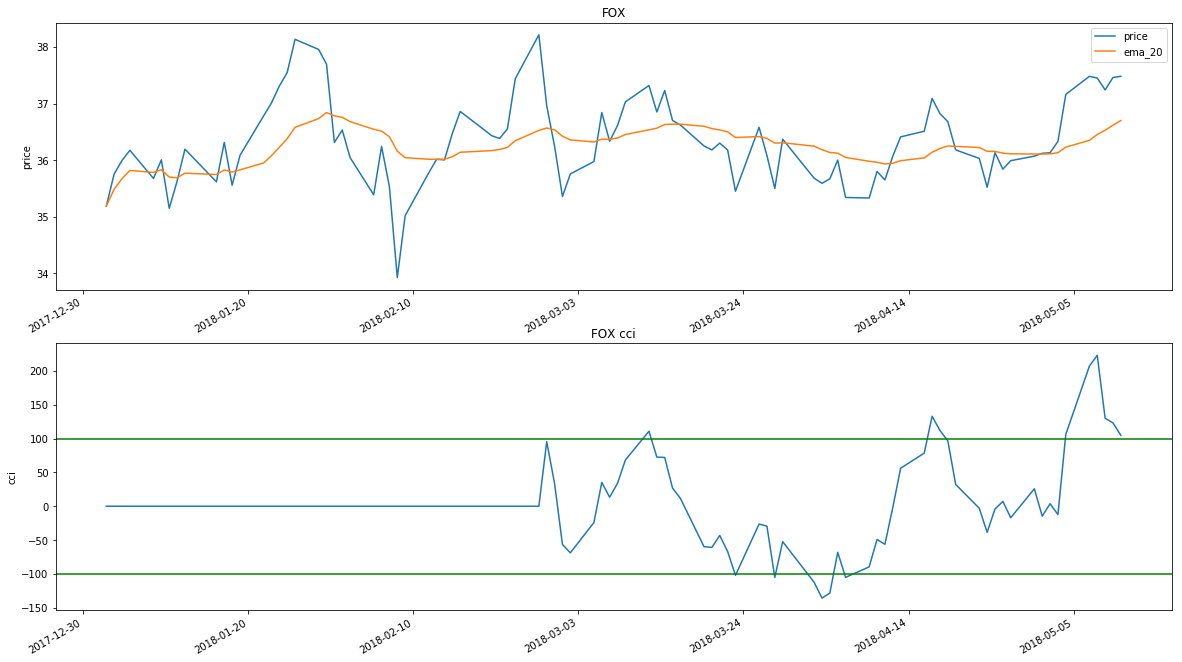

In [27]:
plt.figure(figsize=(20,12))

plt.figure(1)
plt.subplot(211)
feat_df['close'].plot()
feat_df['close_ema_20'].plot()
plt.legend(['price', 'ema_20'])
plt.ylabel('price')
plt.title(symbol)

plt.subplot(212)
fig = feat_df['cci'].fillna(0).plot()
plt.axhline(y=100, color='g', linestyle='-')
plt.axhline(y=-100, color='g', linestyle='-')
plt.ylabel('cci')
plt.title(symbol + ' cci')
plt.show()

## Strategy with CCI

In [19]:
def cci_strategy_return(df, threshold, period, debug=False):
    
    def get_cci_trade_point(df):
        trades = []
        previous_cci = 0
        state = 'neutral'
        for index, row in df.iterrows():
            if row['cci'] > threshold and row['cci'] < previous_cci and state != 'overbought':
                state = 'overbought'
                trades.append((index, 'sell', row['close']))
            elif row['cci'] < -threshold and row['cci'] > previous_cci and state != 'oversold':
                state = 'oversold'
                trades.append((index, 'buy', row['close']))
            previous_cci = row['cci']
        
        return trades
    
    def cal_trade_return(trades):
        r = 1
        i = 1
        
        if len(trades) == 0:
            return r
    
        if trades[0][1] == 'sell':
            trades = trades[1:]
        
        while i <= len(trades) - 1:
            diff = 1.0 * (trades[i][2] / trades[i - 1][2])
            r *= diff
            i += 2
        
        return r
    
    cci_producer = CCIFeatureProducer(period=period, abs_threshold=None)
    feat_df = cci_producer.produce(df)

    trades = get_cci_trade_point(feat_df)
    if debug:
        if len(trades) == 0:
            print 'No trades happened'
        for t in trades:
            print(t)
        
    return cal_trade_return(trades)

In [20]:
symbols = ['MCHP', 'FOX', 'FOXA', 'CA', 'ALGN', 'CHKP']
start = '2018-1-1'
end = '2018-5-12'
threshold = 100
period = 20

In [21]:
print('CCI strategy return between %s and %s' % (start, end))

def get_return(s):
    df = get_historical(s, start, end)
    cci_return = cci_strategy_return(df, threshold, period, True)
    static_return = 1.0 * df['close'].values[-1] / df['close'].values[0]
    return {'cci_return': cci_return, 'static_return': static_return}

returns = [get_return(s) for s in symbols]
result = pd.DataFrame(data=returns, index=symbols)
result

CCI strategy return between 2018-1-1 and 2018-5-12
No trades happened
(Timestamp('2018-04-04 00:00:00'), 'buy', 35.67)
(Timestamp('2018-04-18 00:00:00'), 'sell', 36.82)
(Timestamp('2018-04-04 00:00:00'), 'buy', 36.14)
(Timestamp('2018-04-18 00:00:00'), 'sell', 37.31)
(Timestamp('2018-03-12 00:00:00'), 'sell', 36.81)
(Timestamp('2018-03-26 00:00:00'), 'buy', 34.15)
(Timestamp('2018-04-03 00:00:00'), 'buy', 243.62)
(Timestamp('2018-03-26 00:00:00'), 'buy', 100.85)


,cci_return,static_return
MCHP,1.000000,1.032492
FOX,1.032240,1.065132
FOXA,1.032374,1.063094
CA,1.000000,1.059548
ALGN,1.000000,1.275443
CHKP,1.000000,0.965886


In [11]:
cci_strategy_return(get_historical('BXP', start, end), debug=True)

TypeError: cci_strategy_return() takes at least 3 arguments (2 given)